In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Modelo de Regresión Logística

## Titanic
Vamos a crear un modelo que prediga la probabilidad de supervivencia de los pasajeros

https://www.kaggle.com/c/titanic/data?select=train.csv

0. Importar data de training y testing. Agregarle a la tabla de testing la columna survived proveniente de la tabla gender_submission

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender = pd.read_csv("gender_submission.csv")

In [3]:
test = test.merge(
    gender,
    how = "left"
)

In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [5]:
train.shape

(891, 12)

## Buscar Nulos

In [17]:
gender.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [24]:
test.isnull().sum()/418

PassengerId    0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
Survived       0.0
dtype: float64

In [19]:
train.isnull().sum()/891

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

## Completar y eliminar columnas

In [9]:
train.drop(columns = "Cabin", inplace = True)

In [10]:
test.drop(columns = "Cabin", inplace = True)

## Completar valores nulos

<Axes: xlabel='Embarked', ylabel='Count'>

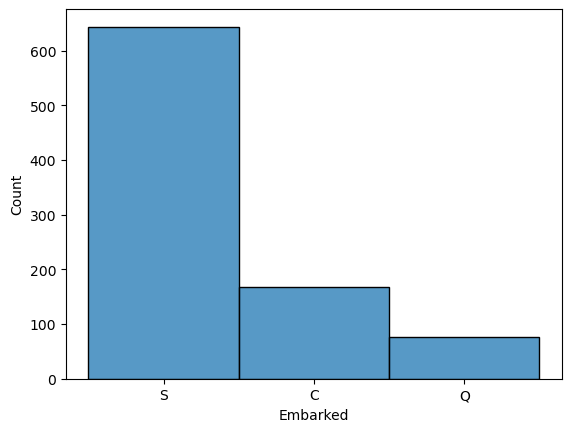

In [11]:
sns.histplot(
    data = train,
    x = "Embarked"
)

In [12]:
train['Age'] = train['Age'].fillna(train['Age'].median())

In [13]:
test['Age'] = test['Age'].fillna(test['Age'].median())

In [20]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [15]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S,0


In [21]:
test.groupby("Pclass").Fare.mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [22]:
test["Fare"]= test["Fare"].fillna(12.459678)

In [23]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S,0


## Realizar análisis exploratorio. Graficar las personas que sobrevivieron por:
    - Clase (Pclass)
    - Sexo (Sex)
    - Costo de boleto (Fare)

<Axes: xlabel='Pclass', ylabel='count'>

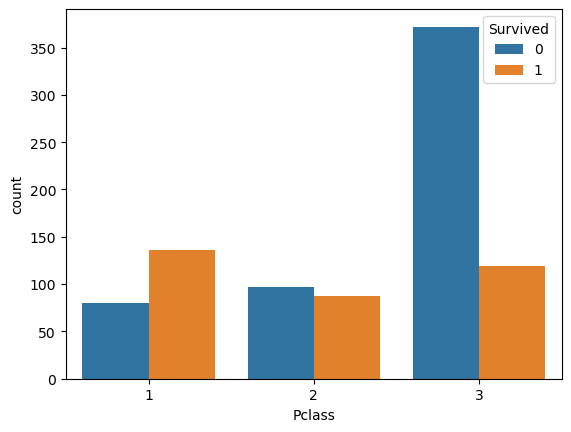

In [25]:
sns.countplot(data = train, x = "Pclass", hue = "Survived")

<Axes: xlabel='Sex', ylabel='count'>

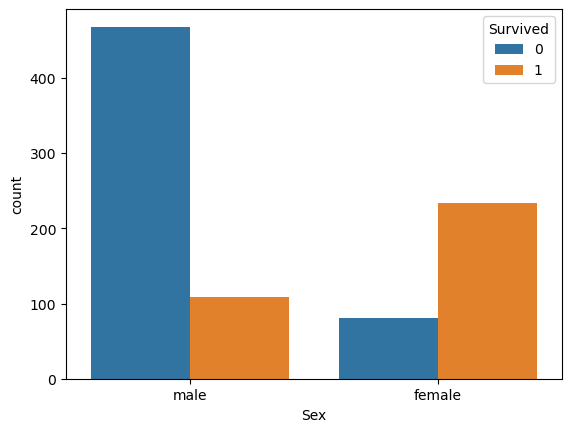

In [26]:
sns.countplot(data = train, x = "Sex", hue = "Survived")

<Axes: xlabel='Fare', ylabel='Count'>

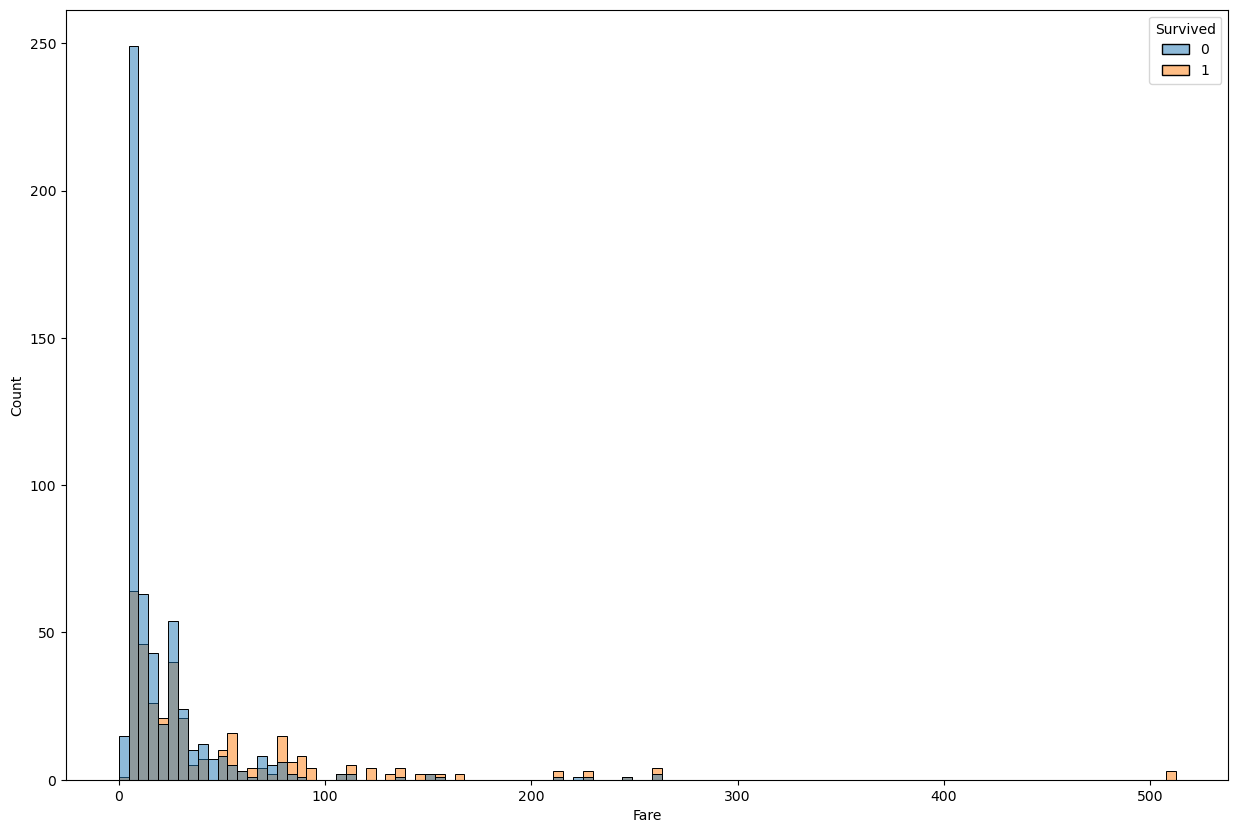

In [27]:
plt.figure(figsize = (15,10))
sns.histplot(data = train, x = "Fare", hue = "Survived")

## Generar Dummies

In [28]:
train["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [29]:
train["Sex"] = np.where(train["Sex"] == "male", 0, 1)
test["Sex"] = np.where(test["Sex"] == "male", 0, 1)

In [30]:
train = pd.get_dummies(
    train,
    columns = ["Pclass","Embarked", "Sex"],
    drop_first = True 
)

test = pd.get_dummies(
    test,
    columns = ["Pclass","Embarked", "Sex"],
    drop_first = True
)

In [36]:
train

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_1
0,0,22.0,1,0,7.2500,False,True,False,True,False
1,1,38.0,1,0,71.2833,False,False,False,False,True
2,1,26.0,0,0,7.9250,False,True,False,True,True
3,1,35.0,1,0,53.1000,False,False,False,True,True
4,0,35.0,0,0,8.0500,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,True,False,False,True,False
887,1,19.0,0,0,30.0000,False,False,False,True,True
888,0,28.0,1,2,23.4500,False,True,False,True,True
889,1,26.0,0,0,30.0000,False,False,False,False,False


## Eliminar columnas del dataset que no suman al modelo.

In [35]:
train.drop(columns = "Name", inplace = True)
test.drop(columns = "Name", inplace = True)

KeyError: "['Name'] not found in axis"

In [ ]:
train.drop(columns = "Ticket", inplace = True)
test.drop(columns = "Ticket", inplace = True)

In [ ]:
train.drop(columns = "PassengerId", inplace = True)
test.drop(columns = "PassengerId", inplace = True)

## Agrego una columna llamada "IsMinor" que sea 1 en caso de tener 16 años o menos y 0 en caso contrario.

In [37]:
train["IsMinor"] = np.where(train["Age"] <= 16, 1, 0)
test["IsMinor"] = np.where(test["Age"] <= 16, 1, 0)

<Axes: xlabel='IsMinor', ylabel='count'>

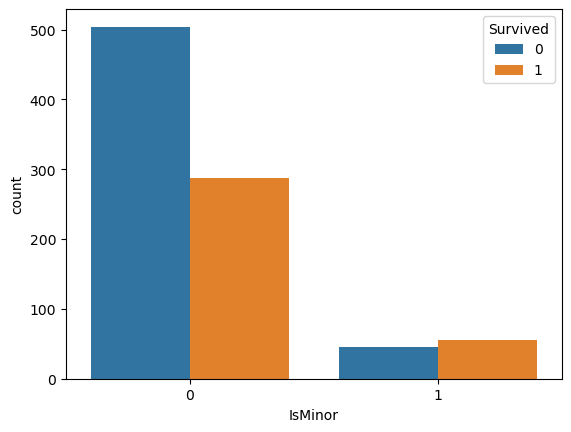

In [38]:
sns.countplot(data = train, x = "IsMinor", hue = "Survived")

## Hacer el modelo de regresión lineal para predecir supervivientes

In [39]:
X_train = train.drop(columns = "Survived")
y_train = train["Survived"]
X_test = test.drop(columns = "Survived")
y_test = test["Survived"]

In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [41]:
lr = LogisticRegression(max_iter = 1000000)

rfe = RFE(
    estimator = lr, 
    n_features_to_select = 10
)


rfe.fit(X_train, y_train)
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

## Validar el modelo

In [42]:
logreg = LogisticRegression(max_iter = 100000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [43]:
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

## Resultados de matriz de confusión

In [44]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [45]:
y_pred = (y_pred_proba > 0.5) * 1

In [46]:
matriz_confusion = confusion_matrix(y_test, y_pred)

In [47]:
pd.DataFrame(
    {"y_real" : y_test, 
     "y_pred": y_pred}
).groupby(["y_pred", "y_real"]).size()

y_pred  y_real
0       0         253
        1          16
1       0          13
        1         136
dtype: int64

## Accuracy

In [48]:
TN = matriz_confusion[0][0]
TP = matriz_confusion[1][1]
FN = matriz_confusion[1][0]
FP = matriz_confusion[0][1]

In [49]:
(TN + TP) / (TN + TP + FN + FP)

np.float64(0.930622009569378)

## Sensibilidad

In [50]:
TP / (TP + FN)

np.float64(0.8947368421052632)

## Especificidad

In [51]:
TN / (TN + FP)

np.float64(0.9511278195488722)

## Graficar curva de ROC

In [52]:
especificidad_inv, sensibilidad, threshold = roc_curve(y_test, y_pred_proba)

In [53]:
recta_x = [i * 0.01 for i in range(101)]
recta_y = recta_x

<Axes: xlabel='1 - Especificidad', ylabel='Sensibilidad'>

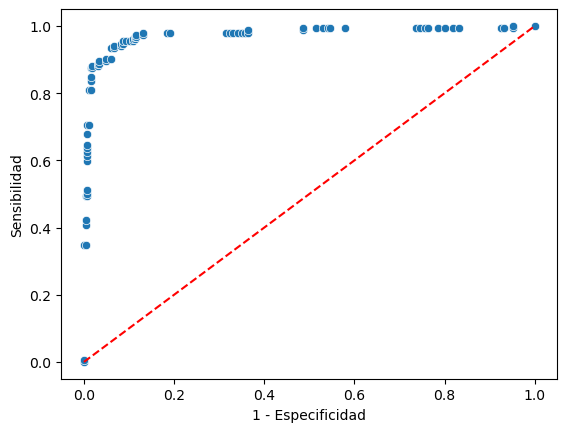

In [54]:
plt.xlabel("1 - Especificidad")
plt.ylabel("Sensibilidad")

sns.lineplot(x = recta_x, y = recta_y, ls = "--",  color = "red")
sns.scatterplot(x = especificidad_inv, y = sensibilidad)

## Valor de área bajo la curva de ROC

In [55]:
roc_auc_score(y_test, y_pred_proba)

np.float64(0.9763553620894343)